In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from env_config import DATA_PATH
from utils import *
from data import *
from plotting import *
from evaluation import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

# Read data

In [5]:
sdss = read_fits_to_pandas(path.join(DATA_PATH, 'SDSS/specObj-dr14.fits'), columns=COLUMNS_SDSS)
sdss = clean_sdss(sdss)

/mnt/home/snakoneczny/tools/anaconda3/envs/python3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Cleaning SDSS: 4223937 left


In [7]:
sdss_x_gaia = read_fits_to_pandas(path.join(DATA_PATH, 'SDSS/SDSS.DR14.x.GAIA.DR2.fits'),
                                  columns=COLUMNS_SDSS+COLUMNS_GAIA)
sdss_x_gaia = clean_sdss(sdss_x_gaia)

Cleaning SDSS: 1435499 left


In [11]:
kids_x_sdss = process_kids(path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'), sdss_cleaning=True,
                           columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS)

Data shape: (152244, 52)
Droping NANs: 130777 (85.90%) left
Cleaning SDSS: 124026 left


In [23]:
kids_x_sdss_x_gaia = process_kids(path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.x.GAIA.DR2.fits'),
                                  sdss_cleaning=True, columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS+COLUMNS_GAIA)

Data shape: (55771, 58)
Droping NANs: 49464 (88.69%) left
Cleaning SDSS: 47862 left


# Describe data

In [14]:
print(get_column_desc(sdss['CLASS']))

GALAXY - 2614235 (61.89%)
QSO - 680843 (16.12%)
STAR - 928859 (21.99%)


In [15]:
print(get_column_desc(sdss_x_gaia['CLASS']))

GALAXY - 344633 (24.01%)
QSO - 361138 (25.16%)
STAR - 729728 (50.83%)


In [16]:
print(get_column_desc(kids_x_sdss['CLASS']))

GALAXY - 85790 (69.17%)
QSO - 13611 (10.97%)
STAR - 24625 (19.85%)


In [17]:
print(get_column_desc(kids_x_sdss_x_gaia['CLASS']))

GALAXY - 16036 (33.50%)
QSO - 9780 (20.43%)
STAR - 22046 (46.06%)


# SDSS x GAIA

5 position shape: (998814, 17)
Removing paralax_error shape: (873439, 20)
Removing pmra_error shape: (725254, 20)
Removing pmdec_error shape: (706461, 20)
GALAXY - 7890 (1.12%)
QSO - 138428 (19.59%)
STAR - 560143 (79.29%)
QSO:
         parallax       pmra       pmdec
mean   -0.0172845 -0.0209419  -0.0258889
median -0.0262785 -0.0106862  0.00750385
sigma    0.517696    1.71207     1.81492
STAR:
        parallax     pmra    pmdec
mean    0.710942 -1.80905 -6.37026
median   0.38428 -1.12754 -4.21969
sigma    1.38027  11.9131  10.8621
GALAXY:
        parallax      pmra    pmdec
mean    0.429216  -1.04325 -3.95648
median   0.23707 -0.292231 -1.67168
sigma    1.41818   8.74701  8.72979


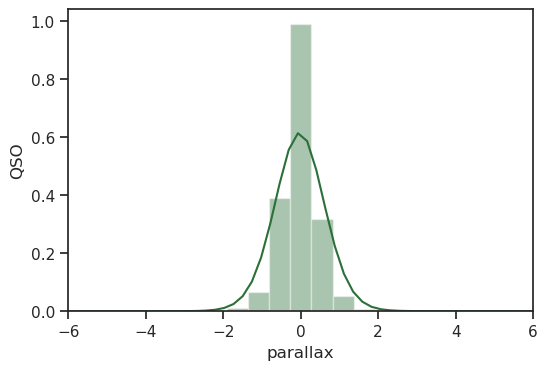

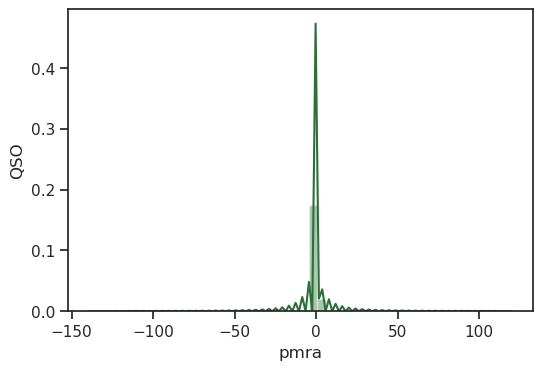

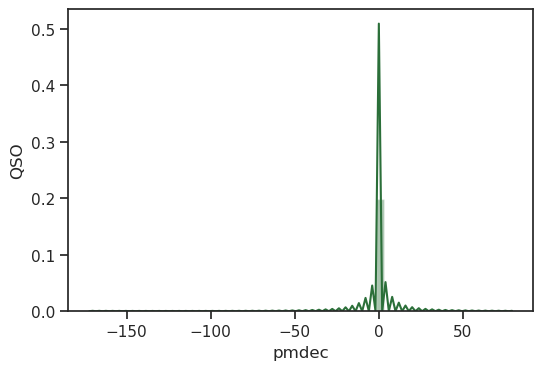

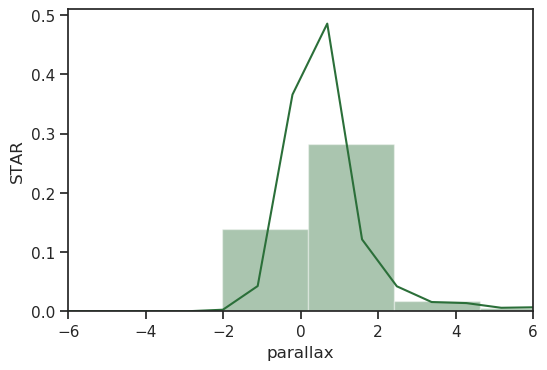

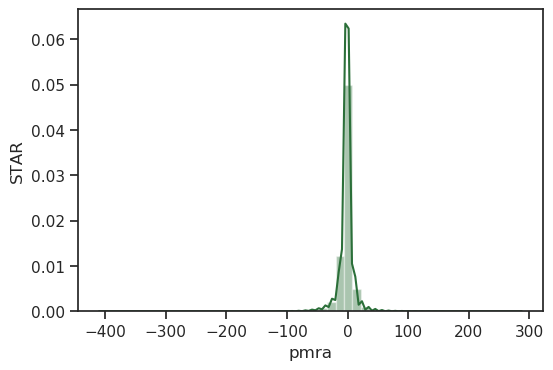

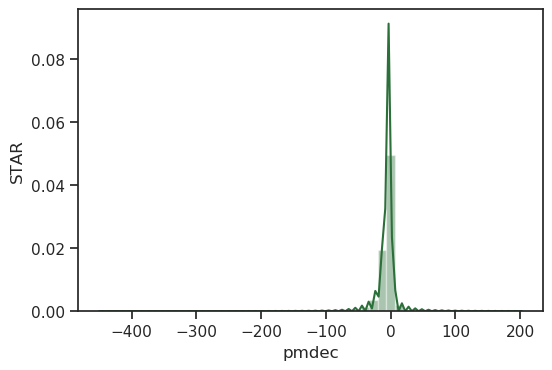

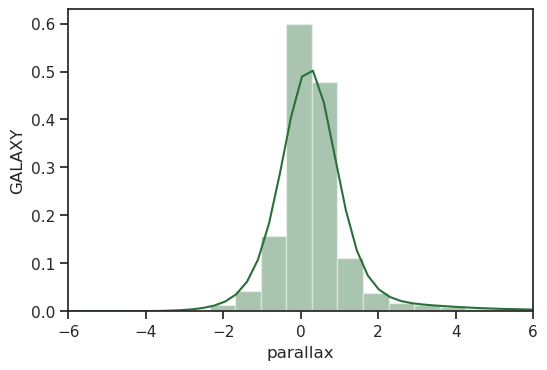

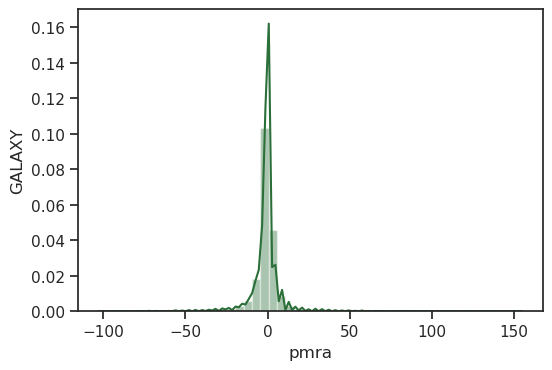

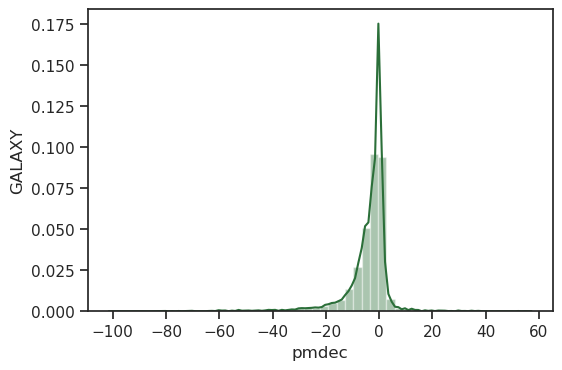

In [19]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, parallax_error=1, pm_error=1)
print(get_column_desc(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, class_col='CLASS')

# KiDS x SDSS x GAIA

5 position shape: (28799, 159)
Removing paralax_error shape: (25167, 162)
Removing pmra_error shape: (19716, 162)
Removing pmdec_error shape: (19612, 162)
GALAXY - 268 (1.37%)
QSO - 3859 (19.68%)
STAR - 15485 (78.96%)
QSO:
          parallax        pmra      pmdec
mean   -0.00450703 -0.00998079 -0.0117933
median  -0.0113339  -0.0158939 -0.0020249
sigma     0.455086     2.04443    1.34638
STAR:
        parallax     pmra    pmdec
mean    0.595182 -6.29608 -6.19967
median  0.333435 -3.82349 -3.97394
sigma    1.25028  11.2685  9.78053
GALAXY:
        parallax     pmra    pmdec
mean    0.436815 -5.22212 -4.98812
median  0.196996 -2.26368  -2.7628
sigma    1.35848  9.97708  9.46378


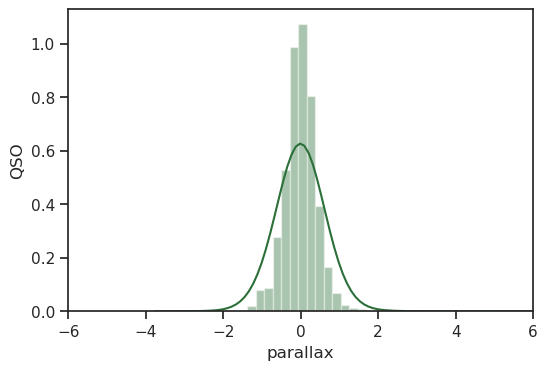

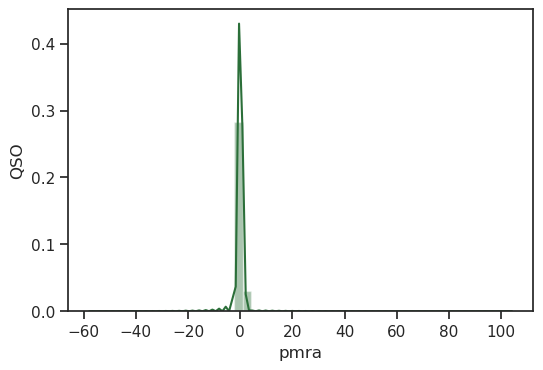

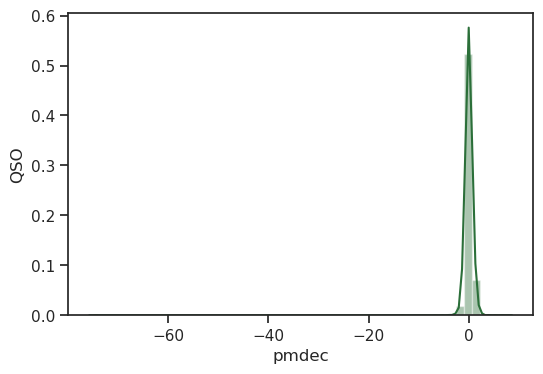

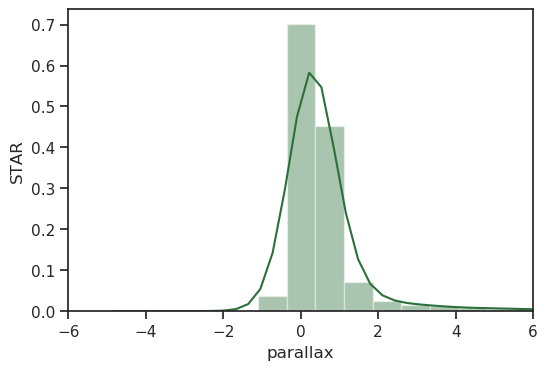

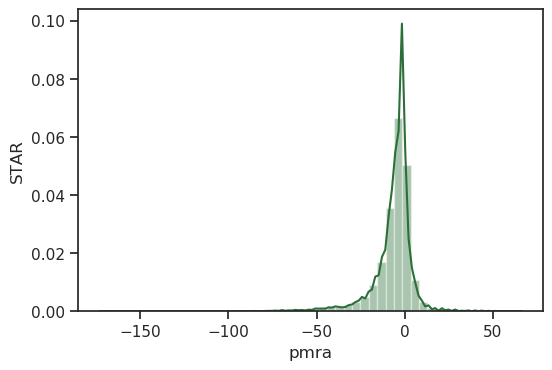

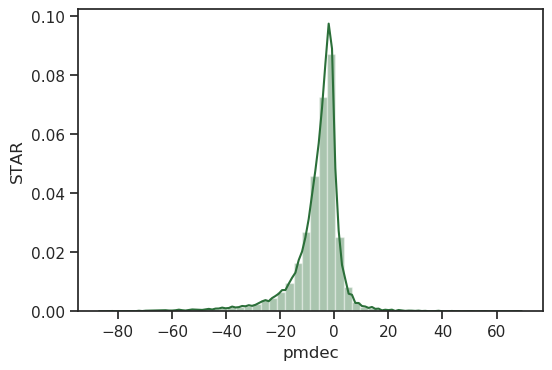

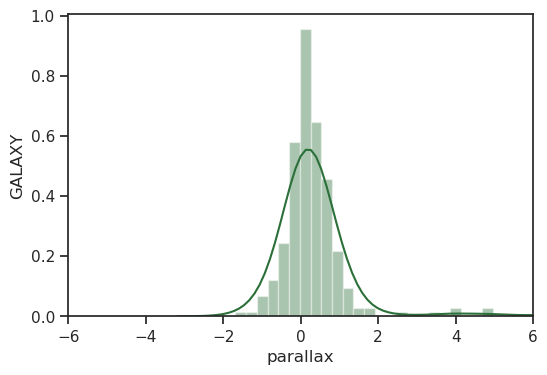

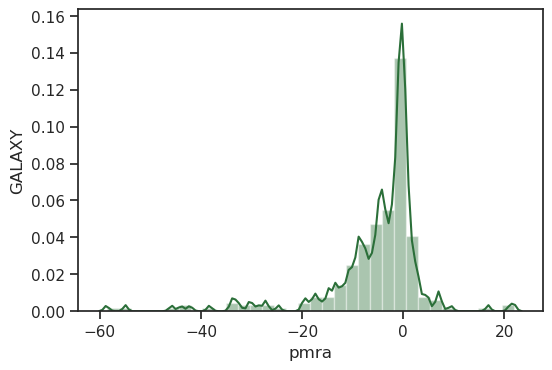

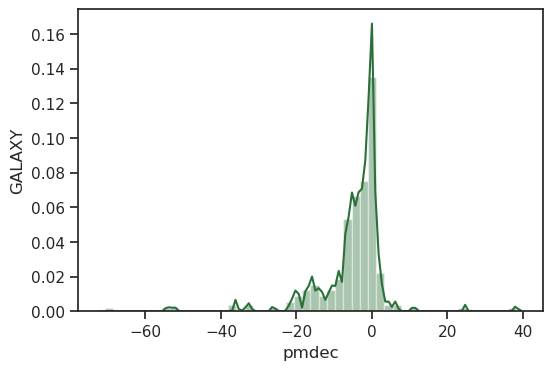

In [24]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, parallax_error=1, pm_error=1)
print(get_column_desc(kids_x_sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean, class_col='CLASS')